# Laboratory Exercise 1

## Obtain

In [134]:
# import packages for analysis and modeling
import os
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

In [3]:
#set working directory
os.chdir(r'C:\Users\brcro\OneDrive\Documents\Syracuse\IST 718 - Big Data Analytics\HW\Week 3 Lab')
os.listdir()

['.ipynb_checkpoints',
 'coaches_modify.xlsx',
 'GraduationRates.xlsx',
 'IST718_Lab1.ipynb',
 'laboratory_exercise_1.pdf',
 'StadiumCapacity.csv',
 'StadiumCapacity.xlsx']

In [69]:
# read in coaches data and create data frame
coaches = pd.read_excel("coaches_modify.xlsx")
print(coaches.shape)
coaches.head()

(118, 23)


,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
0,Air Force,Mt. West,Troy Calhoun,59577780.0,879288.0,885000.0,885000.0,247000.0,NaN,885000.0,...,97,64.666667,67,10.0,3.0,3.333333,4.96,-0.87,4.09,78.16
1,Akron,MAC,Terry Bowden,35331217.0,492413.0,411000.0,412500.0,225000.0,50000.0,462500.0,...,5,10.666667,129,5.0,7.0,0.714286,-0.40,-6.12,-6.52,72.64
2,Alabama,SEC,Nick Saban,174307419.0,3929800.0,8307000.0,8307000.0,1100000.0,500000.0,8807000.0,...,84,111.333333,5,14.0,1.0,14.000000,8.01,17.62,25.62,90.38
3,Appalachian State,Sun Belt,Scott Satterfield,35058621.0,675000.0,712500.0,712500.0,295000.0,145000.0,857500.0,...,13,19.666667,122,10.0,3.0,3.333333,-0.86,9.68,8.83,70.76
4,Arizona,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,2025000.0,NaN,2000000.0,...,60,65.666667,62,3.0,9.0,0.333333,1.01,-5.64,-4.63,74.42


In [6]:
coaches.describe()

,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,Graduation Rate (GSR),Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
count,9.900000e+01,1.180000e+02,1.130000e+02,1.130000e+02,9.600000e+01,6.300000e+01,1.140000e+02,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,8.292182e+07,2.301919e+06,2.550025e+06,2.557438e+06,9.175975e+05,2.011909e+05,2.679926e+06,53059.228814,74.644068,67.245763,65.152542,65.666667,62.203390,6.775701,5.981308,1.865069,0.787757,0.827009,1.614579,76.364673
std,4.768607e+07,1.313944e+06,1.906396e+06,1.910683e+06,6.500860e+05,2.640723e+05,1.999123e+06,23699.435546,14.246022,37.649289,38.479127,28.235948,37.878474,3.032243,2.441703,2.396191,6.030251,6.443782,9.220991,7.547450
min,1.613242e+07,4.924130e+05,3.900000e+05,3.900000e+05,5.000000e+04,1.000000e+04,3.900000e+05,9214.000000,0.000000,1.000000,1.000000,10.666667,1.000000,1.000000,1.000000,0.090909,-13.010000,-11.120000,-18.860000,60.550000
25%,3.818882e+07,8.069122e+05,8.500000e+05,8.500000e+05,4.032500e+05,5.000000e+04,8.912500e+05,32062.000000,69.250000,36.250000,33.250000,42.916667,30.000000,4.000000,4.000000,0.500000,-3.460000,-3.370000,-5.700000,70.510000
50%,8.367264e+07,2.458032e+06,2.163000e+06,2.163000e+06,8.075000e+05,9.500000e+04,2.325603e+06,50035.500000,75.000000,66.500000,67.000000,66.333333,59.000000,7.000000,6.000000,1.166667,0.480000,0.290000,2.300000,75.160000
75%,1.146884e+08,3.775000e+06,3.703975e+06,3.703975e+06,1.263750e+06,2.770835e+05,3.946500e+06,66680.000000,83.750000,98.750000,100.000000,85.333333,95.500000,9.000000,8.000000,2.250000,4.835000,5.010000,8.170000,81.130000
max,2.148306e+08,3.929800e+06,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,8.807000e+06,107601.000000,100.000000,130.000000,130.000000,126.333333,129.000000,14.000000,11.000000,14.000000,14.640000,17.620000,25.620000,92.540000


In [7]:
#Understand data types in data frame
coaches.dtypes

School                    object
Conf                      object
Coach                     object
NCAAFBREV16              float64
MedianConfSal            float64
SchoolPay                float64
TotalPay                 float64
Bonus                    float64
BonusPaid                float64
PayPlusBonus2016         float64
StadSize                   int64
Graduation Rate (GSR)      int64
Seat Rank                  int64
GSRank                     int64
Combo Rank               float64
TrueRank                   int64
W                        float64
L                        float64
Ratio                    float64
OffenceScore             float64
Defense Score            float64
Score                    float64
PointsPerGame            float64
dtype: object

In [84]:
#Read in Graduation Rates 
grad_rates = pd.read_excel('GraduationRates.xlsx')
print(grad_rates.shape)
grad_rates.head(10)

(242, 8)


,Cohort Year,School,School2,Conference,Sport,State,GSR,FGR
0,2006,University of Akron,Akron,Mid-American Conference,Football,OH,58,52.0
1,2006,Alabama A&M University,NaN,Southwestern Athletic Conf.,Football,AL,40,45.0
2,2006,Alabama State University,NaN,Southwestern Athletic Conf.,Football,AL,81,59.0
3,2006,University of Alabama,Alabama,Southeastern Conference,Football,AL,73,57.0
4,2006,University of Alabama at Birmingham,NaN,Conference USA,Football,AL,60,55.0
5,2006,University at Albany,NaN,Northeast Conference,Football,NY,74,57.0
6,2006,Alcorn State University,NaN,Southwestern Athletic Conf.,Football,MS,57,39.0
7,2006,Appalachian State University,Appalachian State,Southern Conference,Football,NC,68,56.0
8,2006,Arizona State University,Arizona State,Pac-12 Conference,Football,AZ,67,52.0
9,2006,University of Arizona,Arizona,Pac-12 Conference,Football,AZ,61,59.0


In [72]:
#Read in Stadium Capacity
stadium_capacity = pd.read_excel('StadiumCapacity.xlsx')
print(stadium_capacity.shape)
stadium_capacity.head()

(230, 9)


,stadium,city,state,team,conference,capacity,built,expanded,div
0,Falcon Stadium,Colorado Springs,CO,Air Force,Mountain West,46692,1962,NaN,fbs
1,Summa Field at InfoCision Stadium,Akron,OH,Akron,MAC,30000,2009,NaN,fbs
2,Bryant–Denny Stadium,Tuscaloosa,AL,Alabama,SEC,101821,1929,2010,fbs
3,Kidd Brewer Stadium,Boone,NC,Appalachian State,Sun Belt,24050,1962,2009,fbs
4,Arizona Stadium,Tucson,AZ,Arizona,Pac-12,51811,1928,1988,fbs


## Scrub

'1. Merge datasets

In [36]:
def editUniversityName(college):
    """
    Need to edit how the university is listed so that they can be properly merged.
    Removing 'university', 'of', and 'at' to get at root college name.
    """
    return(college.replace('University ', '').replace('of ', '').replace('at ','').replace('University', '').replace('College ', '').replace('College', ''))

In [54]:
grad_rates['School2'] = grad_rates['School'].apply(lambda x: editUniversityName(x))
grad_rates.head(5)

,Cohort Year,School,Conference,Sport,State,GSR,FGR,School2
0,2006,University of Akron,Mid-American Conference,Football,OH,58,52.0,Akron
1,2006,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,40,45.0,Alabama A&M
2,2006,Alabama State University,Southwestern Athletic Conf.,Football,AL,81,59.0,Alabama State
3,2006,University of Alabama,Southeastern Conference,Football,AL,73,57.0,Alabama
4,2006,University of Alabama at Birmingham,Conference USA,Football,AL,60,55.0,Alabama Birmingham


In [83]:
#Merge the tables
df = pd.merge(coaches, stadium_capacity, how = 'inner', left_on = 'School', 
              right_on = 'team')
#df[df['team'].isnull()] use to find missing schools from merge when using a left merge
print(df.shape)
df.head()
#dropped 3 schools from inner merge that were not in stadium capacity 
#(118 in coaches)

(115, 32)


,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,PointsPerGame,stadium,city,state,team,conference,capacity,built,expanded,div
0,Air Force,Mt. West,Troy Calhoun,59577780.0,879288.0,885000.0,885000.0,247000.0,NaN,885000.0,...,78.16,Falcon Stadium,Colorado Springs,CO,Air Force,Mountain West,46692,1962,NaN,fbs
1,Akron,MAC,Terry Bowden,35331217.0,492413.0,411000.0,412500.0,225000.0,50000.0,462500.0,...,72.64,Summa Field at InfoCision Stadium,Akron,OH,Akron,MAC,30000,2009,NaN,fbs
2,Alabama,SEC,Nick Saban,174307419.0,3929800.0,8307000.0,8307000.0,1100000.0,500000.0,8807000.0,...,90.38,Bryant–Denny Stadium,Tuscaloosa,AL,Alabama,SEC,101821,1929,2010,fbs
3,Appalachian State,Sun Belt,Scott Satterfield,35058621.0,675000.0,712500.0,712500.0,295000.0,145000.0,857500.0,...,70.76,Kidd Brewer Stadium,Boone,NC,Appalachian State,Sun Belt,24050,1962,2009,fbs
4,Arizona,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,2025000.0,NaN,2000000.0,...,74.42,Arizona Stadium,Tucson,AZ,Arizona,Pac-12,51811,1928,1988,fbs


In [95]:
#Merge the tables
df_final = pd.merge(df, grad_rates, how = 'inner', left_on = 'School', 
              right_on = 'School2')
print(df_final.shape)
df_final.head()
#dropped 12 schools from inner merge that were not in graduation rates
#(118 in coaches) (115 in intermediate table)

(103, 40)


,School_x,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,expanded,div,Cohort Year,School_y,School2,Conference,Sport,State,GSR,FGR
0,Akron,MAC,Terry Bowden,35331217.0,492413.0,411000.0,412500.0,225000.0,50000.0,462500.0,...,NaN,fbs,2006,University of Akron,Akron,Mid-American Conference,Football,OH,58,52.0
1,Alabama,SEC,Nick Saban,174307419.0,3929800.0,8307000.0,8307000.0,1100000.0,500000.0,8807000.0,...,2010,fbs,2006,University of Alabama,Alabama,Southeastern Conference,Football,AL,73,57.0
2,Appalachian State,Sun Belt,Scott Satterfield,35058621.0,675000.0,712500.0,712500.0,295000.0,145000.0,857500.0,...,2009,fbs,2006,Appalachian State University,Appalachian State,Southern Conference,Football,NC,68,56.0
3,Arizona,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,2025000.0,NaN,2000000.0,...,1988,fbs,2006,University of Arizona,Arizona,Pac-12 Conference,Football,AZ,61,59.0
4,Arizona State,Pac-12,Herm Edwards,101579860.0,2752232.5,2000000.0,2000000.0,3010000.0,NaN,2000000.0,...,1998,fbs,2006,Arizona State University,Arizona State,Pac-12 Conference,Football,AZ,67,52.0


'2. Drop unneeded and duplicate columns. Rename appropriately. 

In [91]:
df_final.columns

Index(['School_x', 'Conf', 'Coach', 'NCAAFBREV16', 'MedianConfSal',
       'SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'PayPlusBonus2016',
       'StadSize', 'Graduation Rate (GSR)', 'Seat Rank', 'GSRank',
       'Combo Rank', 'TrueRank', 'W', 'L', 'Ratio', 'OffenceScore',
       'Defense Score', 'Score', 'PointsPerGame', 'stadium', 'city', 'state',
       'team', 'conference', 'capacity', 'built', 'expanded', 'div',
       'Cohort Year', 'School_y', 'School2', 'Conference', 'Sport', 'State',
       'GSR', 'FGR'],
      dtype='object')

In [98]:
df_final.pop('School_y')
df_final.pop('School2')
df_final.pop('expanded')
df_final.pop('Bonus')
df_final.pop('div')
df_final.pop('Cohort Year')
df_final.pop('Conference')
df_final.pop('Sport')
df_final.pop('stadium')
df_final.pop('city')
df_final.shape

(103, 30)

In [103]:
df_final['School'] = df_final['School_x']
df_final.pop('School_x')
df_final.describe()

,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,BonusPaid,PayPlusBonus2016,StadSize,Graduation Rate (GSR),Seat Rank,GSRank,...,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame,built,GSR,FGR
count,8.700000e+01,1.030000e+02,9.900000e+01,9.900000e+01,5.800000e+01,1.000000e+02,103.000000,103.000000,103.000000,103.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,103.000000,103.000000,103.000000
mean,8.760487e+07,2.451274e+06,2.744241e+06,2.752702e+06,1.941815e+05,2.876260e+06,55176.320388,75.611650,70.310680,68.330097,...,6.978723,5.808511,1.985816,1.255957,1.339787,2.595638,76.995426,1956.116505,69.223301,57.524272
std,4.764802e+07,1.287500e+06,1.931437e+06,1.935412e+06,2.347354e+05,2.026517e+06,23804.919798,14.278898,37.487783,38.097756,...,3.005295,2.410892,2.513103,5.863194,6.553161,8.916544,7.365816,29.804691,11.179403,10.579155
min,2.530329e+07,4.924130e+05,4.000000e+05,4.000000e+05,1.000000e+04,4.250000e+05,9214.000000,0.000000,1.000000,1.000000,...,2.000000,1.000000,0.200000,-13.010000,-11.120000,-18.240000,60.550000,1913.000000,44.000000,37.000000
25%,4.239662e+07,8.792880e+05,1.000000e+06,1.000000e+06,5.000000e+04,1.062500e+06,33413.000000,70.000000,39.000000,34.000000,...,4.000000,4.000000,0.500000,-2.950000,-2.682500,-4.422500,71.420000,1927.500000,60.500000,51.500000
50%,8.742753e+07,2.458032e+06,2.512000e+06,2.512000e+06,1.000000e+05,2.527894e+06,52454.000000,76.000000,74.000000,70.000000,...,7.000000,6.000000,1.166667,0.810000,0.880000,2.575000,75.780000,1960.000000,68.000000,57.000000
75%,1.190198e+08,3.775000e+06,3.890217e+06,3.890217e+06,2.781252e+05,4.069063e+06,69516.000000,84.000000,102.000000,101.000000,...,9.000000,8.000000,2.250000,5.062500,5.327500,8.740000,81.290000,1974.500000,75.500000,63.000000
max,2.148306e+08,3.929800e+06,8.307000e+06,8.307000e+06,1.350000e+06,8.807000e+06,107601.000000,100.000000,130.000000,130.000000,...,14.000000,10.000000,14.000000,14.640000,17.620000,25.620000,92.540000,2014.000000,97.000000,92.000000


'3. Clean the stadium capacity columns into proper format

In [104]:
#Create a function to clean numbers
def cleanNumbers(number):
    number = str(number).replace(',','')
    if (number[-3] == '[') and (number[-1] == ']'):
        return(number[:-3])
    else:
        return(number)

In [105]:
#apply the function to Capacity, Built, and Expanded columns
df_final['capacity'] = df_final['capacity'].apply(lambda x: cleanNumbers(x))
df_final['cuilt'] = df_final['built'].apply(lambda x: cleanNumbers(x))
df_final.head()

,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,BonusPaid,PayPlusBonus2016,StadSize,Graduation Rate (GSR),...,state,team,conference,capacity,built,State,GSR,FGR,cuilt,School
0,MAC,Terry Bowden,35331217.0,492413.0,411000.0,412500.0,50000.0,462500.0,30000,45,...,OH,Akron,MAC,30000,2009,OH,58,52.0,2009,Akron
1,SEC,Nick Saban,174307419.0,3929800.0,8307000.0,8307000.0,500000.0,8807000.0,101821,79,...,AL,Alabama,SEC,101821,1929,AL,73,57.0,1929,Alabama
2,Sun Belt,Scott Satterfield,35058621.0,675000.0,712500.0,712500.0,145000.0,857500.0,24050,57,...,NC,Appalachian State,Sun Belt,24050,1962,NC,68,56.0,1962,Appalachian State
3,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,NaN,2000000.0,51811,74,...,AZ,Arizona,Pac-12,51811,1928,AZ,61,59.0,1928,Arizona
4,Pac-12,Herm Edwards,101579860.0,2752232.5,2000000.0,2000000.0,NaN,2000000.0,71706,74,...,AZ,Arizona State,Pac-12,71706,1958,AZ,67,52.0,1958,Arizona State


'4. Handle missing values

In [106]:
df_final[df_final.isnull().any(axis=1)]

,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,BonusPaid,PayPlusBonus2016,StadSize,Graduation Rate (GSR),...,state,team,conference,capacity,built,State,GSR,FGR,cuilt,School
3,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,NaN,2000000.0,51811,74,...,AZ,Arizona,Pac-12,51811,1928,AZ,61,59.0,1928,Arizona
4,Pac-12,Herm Edwards,101579860.0,2752232.5,2000000.0,2000000.0,NaN,2000000.0,71706,74,...,AZ,Arizona State,Pac-12,71706,1958,AZ,67,52.0,1958,Arizona State
8,Big 12,Matt Rhule,NaN,3775000.0,NaN,NaN,NaN,NaN,45140,71,...,TX,Baylor,Big 12,45140,2014,TX,67,48.0,2014,Baylor
10,ACC,Steve Addazio,NaN,2458032.5,2514859.0,2514859.0,NaN,2514859.0,44500,90,...,MA,Boston College,ACC,44500,1957,MA,94,86.0,1957,Boston College
11,MAC,Mike Jinks,25303291.0,492413.0,437228.0,437228.0,81250.0,518478.0,23724,90,...,OH,Bowling Green,MAC,23724,1966,OH,70,55.0,1966,Bowling Green
12,Ind.,Kalani Sitake,NaN,716260.5,NaN,NaN,NaN,NaN,63725,82,...,UT,BYU,Independent,63725,1964,UT,57,42.0,1964,BYU
13,MAC,Lance Leipold,35892221.0,492413.0,455500.0,455500.0,NaN,455500.0,29013,89,...,NY,Buffalo,MAC,29013,1993,NY,59,58.0,1993,Buffalo
15,AAC,Josh Heupel,56327225.0,2458032.5,1700000.0,1700000.0,NaN,1700000.0,45301,64,...,FL,UCF,American,45323,2007,FL,83,58.0,2007,UCF
17,AAC,Luke Fickell,60458195.0,2458032.5,2000000.0,2000000.0,NaN,2000000.0,40000,56,...,OH,Cincinnati,American,40000,1924,OH,65,57.0,1924,Cincinnati
19,Sun Belt,Joe Moglia,33703994.0,675000.0,400000.0,400000.0,25000.0,425000.0,9214,85,...,South Carolina,Coastal Carolina,Big South,9214,2003,SC,66,57.0,2003,Coastal Carolina


## Explore

C:\Users\brcro\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


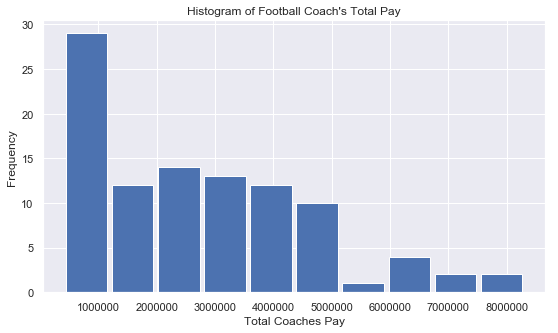

In [149]:
filtered_pay = df_final['TotalPay'].dropna()
plt.figure(figsize=(9,5))
plt.hist(filtered_pay, normed = False, stacked = False, rwidth = .9)
plt.title("Histogram of Football Coach's Total Pay")
plt.xlabel('Total Coaches Pay')
plt.ylabel('Frequency')
plt.show()

Text(0,0.5,'Total Coach Pay')

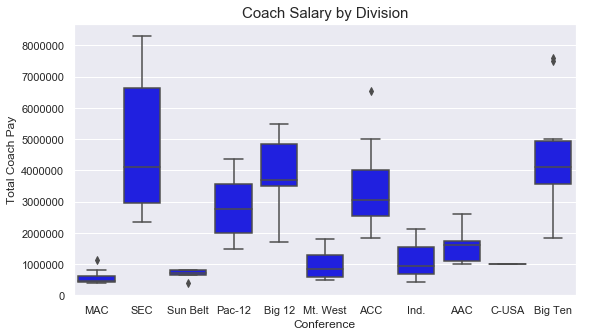

In [145]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Conf", y="TotalPay", data=df_final, color = "blue")
plt.title('Coach Salary by Division', fontsize = 15)
plt.xlabel('Conference', fontsize = 12)
plt.ylabel('Total Coach Pay', fontsize = 12)